<a href="https://colab.research.google.com/github/estevaosmith/Portifolio/blob/main/PROJETO_Classifica%C3%A7%C3%A3o_de_Roupas_usando_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Roupas usando Deep Learning

***Fashion MNIST*** é uma coleção de dados amplamente utilizada no campo do **Deep Learning** e **Computer Vision**, composta por 70 mil imagens distribuídas em 10 categorias distintas.

Apesar de suas imagens serem fornecidas já processadas, representa um excelente desafio para a implementação de redes neurais profundas. Especificamente, é uma ferramenta valiosa para explorar e compreender as redes neurais convolucionais (*Convolutional Neural Networks* - **CNN**).

O conjunto de dados é dividido em duas partes principais: treinamento, composto por 60 mil amostras, e teste, com 10 mil amostras. Cada imagem possui uma resolução de 28 x 28 *pixels*.

<p align="center"><img src="https://www.researchgate.net/publication/349913991/figure/fig4/AS:999291262861319@1615261011992/Fashion-MNIST-dataset.ppm" height="400px"></p>

Cada imagem está associada exclusivamente a uma única classe. A tabela a seguir, baseada na documentação do Fashion MNIST, lista os 10 rótulos possíveis:

<table>
  <tbody><tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</tbody></table>

Este conjunto de dados foi desenvolvido como uma alternativa ao MNIST tradicional, que consistia exclusivamente em imagens de dígitos manuscritos. Alguns dos principais motivos para essa substituição foram:

- O MNIST original era considerado muito simples, já que as *Convolutional Neural Networks* (CNN) conseguiam alcançar facilmente uma precisão de 99,7%.
- Ele não representava mais os desafios contemporâneos enfrentados na área de Visão Computacional.

## Obtenção dos dados

Para este projeto, irei carregar os dados a partir do próprio TensorFlow.

In [1]:
# importar as bibliotecas necessárias
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

# configurar a visualização
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

In [2]:
# carregar os dados do Fashion MNIST
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Exploração dos Dados
Embora este conjunto de dados seja fornecido pré-processado e bem documentado, vamos explorá-lo rapidamente para obter algumas ideias. Primeiro, vou verificar as dimensões das matrizes retornadas pela função `fashion_mnist.load_data()`.

Como mencionado anteriormente, temos 60.000 amostras de treinamento e 10.000 de teste, e as imagens têm dimensões de 28 x 28 *pixels* em escala de cinza (1 canal).

Também é interessante visualizar como uma imagem se parece quando é representada como uma matriz. É importante lembrar que os valores de cada *pixel* estão no intervalo de $[0, 255]$.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

print("Tamanho dados de treino:", X_train_orig.shape)
print("Labels dados de treino:", y_train_orig.shape)
print("Tamanho dados de teste:", X_test_orig.shape)
print("Labels dados de teste:", y_test_orig.shape)


num_classes = np.max(y_train_orig) + 1
print(f"Existem {num_classes} classes")

# De acordo com a documentação, os labels são:
class_names = ['Camisetas/Top', 'Calça', 'Suéter',
               'Vestidos','Casaco', 'Sandálias',
               'Camisas', 'Tênis', 'Bolsa', 'Botas']

Tamanho dados de treino: (60000, 28, 28)
Labels dados de treino: (60000,)
Tamanho dados de teste: (10000, 28, 28)
Labels dados de teste: (10000,)
Existem 10 classes


Como podem ver na célula acima, os dados de treino e teste estão balanceados, então vamos prosseguir para o pré-processamento.


In [ ]:
plt.figure(figsize=(7, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_orig[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_orig[i]])
plt.show()

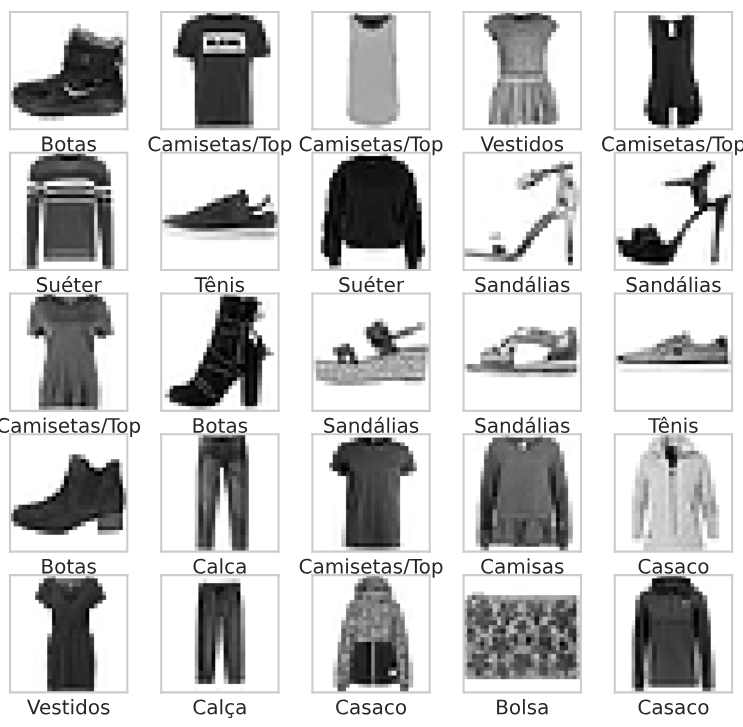

In [31]:
from IPython.display import Image
Image('/content/deeplearningplot.png')


### Normalizar os *pixels*

As intensidades dos pixels devem ser normalizadas. Isso significa que os valores inteiros devem ser convertidos para o tipo `float` e ajustados para que estejam dentro do intervalo $[0, 1]$.

In [4]:
# criar função lambda que transforma em float32 e normaliza os pixels
f = lambda x: (x / 255.0).astype("float32")

# aplicar a função lambda aos datasets X_train e X_test
X_train = f(X_train_orig)
X_test = f(X_test_orig)

### Redimensionar as Imagens

O primeiro layer convolucional espera um único tensor que contenha todos os pixels. O TensorFlow requer uma única lista com 4 dimensões, e não 60.000 itens de dimensões 28 x 28 x 1, como é o caso do dataset de treino

In [5]:
# redimensionar as imagens
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print("X_train:{}".format(X_train.shape))
print("X_test:\t{}".format(X_test.shape))

X_train:(60000, 28, 28, 1)
X_test:	(10000, 28, 28, 1)


In [6]:
from tensorflow.keras.utils import to_categorical

y_train = keras.utils.to_categorical(y_train_orig)
y_test = keras.utils.to_categorical(y_test_orig)

## Definindo uma Rede Neural Convolucional

Há várias estruturas de CNN amplamente reconhecidas. Neste projeto, optou-se por empregar uma versão simplificada da VGGNet, descrita em um artigo escrito pelo Cientista de Dados Adrian Rosebroke.

Eu fiz adaptações na implementação original para ajustar às dimensões de 28 x 28 das imagens que estamos usando e para viabilizar o uso da API Keras.

O modelo será compilado utilizando `sparse_categorical_crossentropy"`, ela e usada como uma loss functions para modelos de classificação multiclasse em que o rótulo de saída é atribuído um valor inteiro (0, 1, 2, 3...). Além disso, será especificado explicitamente o uso de dados de validação em uma proporção de 1/3.

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_orig, epochs=20, validation_split=0.3)

Epoch 1/20
1313/1313 [==============================] - 176s 130ms/step - loss: 0.6048 - accuracy: 0.7804 - val_loss: 0.3702 - val_accuracy: 0.8626
Epoch 2/20
1313/1313 [==============================] - 175s 134ms/step - loss: 0.3825 - accuracy: 0.8632 - val_loss: 0.3069 - val_accuracy: 0.8871
Epoch 3/20
1313/1313 [==============================] - 182s 138ms/step - loss: 0.3335 - accuracy: 0.8803 - val_loss: 0.2834 - val_accuracy: 0.8951
Epoch 4/20
1313/1313 [==============================] - 162s 123ms/step - loss: 0.3004 - accuracy: 0.8914 - val_loss: 0.2651 - val_accuracy: 0.9038
Epoch 5/20
1313/1313 [==============================] - 165s 126ms/step - loss: 0.2765 - accuracy: 0.9002 - val_loss: 0.2446 - val_accuracy: 0.9092
Epoch 6/20
1313/1313 [==============================] - 160s 122ms/step - loss: 0.2610 - accuracy: 0.9054 - val_loss: 0.2418 - val_accuracy: 0.9134
Epoch 7/20
1313/1313 [==============================] - 165s 126ms/step - loss: 0.2459 - accuracy: 0.9090 - val_

## Avaliando o Modelo

No geral, o nosso modelo atingiu uma acurácia de cerca de 94% nos dados de treino e 92% nos dados de validação.

No entanto, se observarmos melhor veremos que ela não teve o desempenho bom para a categoria "Camisas". Provavalmente isso pode ser melhorado com técnicas de *data augmentation*.

In [10]:
y_hat = model.predict(X_test)
y_hat_classes = np.argmax(y_hat, axis=1)
print(classification_report(y_test_orig, y_hat_classes, target_names=class_names))

313/313 [==============================] - 11s 35ms/step
               precision    recall  f1-score   support

Camisetas/Top       0.85      0.90      0.87      1000
        Calça       1.00      0.98      0.99      1000
       Suéter       0.86      0.92      0.89      1000
     Vestidos       0.91      0.93      0.92      1000
       Casaco       0.88      0.88      0.88      1000
    Sandálias       0.99      0.98      0.98      1000
      Camisas       0.81      0.71      0.76      1000
        Tênis       0.94      0.99      0.96      1000
        Bolsa       0.98      0.99      0.98      1000
        Botas       0.99      0.95      0.97      1000

     accuracy                           0.92     10000
    macro avg       0.92      0.92      0.92     10000
 weighted avg       0.92      0.92      0.92     10000



Olhando as curvas *accuracy* e *val_accuracy*, identifica-se talvez um pequeno *overfitting*, mas que não prejudicou muito o desempenho da CNN perante aos dados de validação.

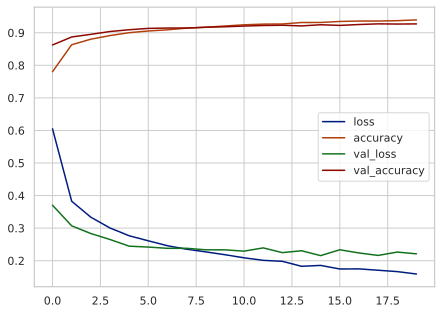

In [11]:
# plotar o histórico da otimização
pd.DataFrame(history.history).plot()
plt.show()

Por fim, vemos que a acurácia no *dataset* de teste se mantém muito boa, o que significa que o modelo é genérico o suficiente para lidar com dados novos.

## Conclusão

Neste projeto, exploramos o conjunto de dados Fashion MNIST, uma ferramenta amplamente reconhecida no campo do Deep Learning e Computer Vision. Apesar de suas imagens serem pré-processadas, representam um desafio valioso para implementação de redes neurais profundas, especialmente para compreender as Convolutional Neural Networks (CNNs). Composto por 70 mil imagens distribuídas em 10 categorias, o conjunto de dados foi dividido em 60 mil amostras de treinamento e 10 mil de teste, cada uma com uma resolução de 28 x 28 pixels em escala de cinza.

Exploramos rapidamente os dados e optamos por uma abordagem simplificada da VGGNet para nossa Rede Neural Convolucional. Utilizamos a função de perda `sparse_categorical_crossentropy` e especificamos o uso de dados de validação em uma proporção de 1/3. Nosso modelo alcançou uma acurácia de cerca de 94% nos dados de treino e 92% nos dados de validação, embora tenha apresentado dificuldades específicas na categoria "Camisas". Futuras melhorias podem ser exploradas com técnicas de data augmentation.

Outro ponto positivo foi que nosso modelo apresentou um overfitting bem reduzido, conforme indicado pelo gráfico, o que demonstra sua generalização suficiente para lidar com novos dados. Isso era uma preocupação minha, já que redes neurais são bastante suscetíveis ao sobreajuste.